# Proje 2 - Scikit-learn ile Makine Öğrenmesi

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi 09.07.2021 Cuma saat 15:00’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 12.07.2021 Pazartesi saat 15:00’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir.
* Projeler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu projelerin notunda aynı oranda kesinti yapılacaktır veya bu projeler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  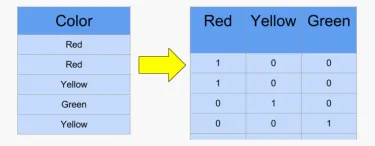
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. 
  Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. 
  Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

["aldigi_degerlendirme_puani", "gerceklestirdigi_proje_sayisi", 
              "sirkette_calistigi_yil_sayisi", "is_kazasina_ugradi", "sirketten_ayrildi",
              "Payment_high","Payment_low","Payment_medium"] tüm bu özniteliklerin etkili olduğunu düşünüyorum.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,max_error,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,mean_poisson_deviance,mean_gamma_deviance,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV,cross_validate

In [2]:
def printMetriscs(y_test, y_pred):
    print("Mean Absolute Error : "+str(mean_absolute_error(y_test, y_pred)))
    print("Mean Squared Error : "+str(mean_squared_error(y_test, y_pred)))
    print("R2 Score : "+str(r2_score(y_test, y_pred)))

In [3]:
def cross_validate_print(model,x_train,y_train):
    scores = cross_validate(model, x_train, y_train, scoring = ['neg_mean_squared_error','r2','neg_mean_absolute_error'], cv=5)
    pd_scores = pd.DataFrame(scores)
    print("Mean Absolute Error : "+str(pd_scores['test_neg_mean_absolute_error'].mean()))
    print("Mean Squared Error : "+str(pd_scores['test_neg_mean_squared_error'].mean()))
    print("R2 Score : "+str(pd_scores['test_r2'].mean()))

In [4]:
df = pd.read_csv("insan_kaynaklari.csv")
df1 = pd.get_dummies(df['calistigi_bolum'], prefix='Department') #One hot encoding için parçalama işlemleri
df2 = pd.get_dummies(df['maas_derecesi'], prefix='Payment') #One hot encoding için parçalama işlemleri

df3 = pd.merge(df, df1, left_index=True, right_index=True) #Dataframe one hot şeklindeki veriyi ekleme
dflast = pd.merge(df3, df2, left_index=True, right_index=True) #Dataframe one hot şeklindeki veriyi ekleme

attributes = ["aldigi_degerlendirme_puani", "gerceklestirdigi_proje_sayisi", 
              "sirkette_calistigi_yil_sayisi", "is_kazasina_ugradi", "sirketten_ayrildi",
              "Payment_high","Payment_low","Payment_medium"]

x = dflast[attributes]
y = dflast["memnuniyet_duzeyi"]

LinearRegression kullanarak yapılmış model

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

print("Cross_validate kullanmadan metrikler : ")
printMetriscs(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(lr_model,x_train,y_train)

Cross_validate kullanmadan metrikler : 
Mean Absolute Error : 0.180237375458743
Mean Squared Error : 0.0500382467575411
R2 Score : 0.1810975533121879

Cross_validate ile metrikler : 
Mean Absolute Error : -0.18024033696209263
Mean Squared Error : -0.04961763208338556
R2 Score : 0.19885171583829142


LinearRegression kullanarak yapılmış modelin hangi parametrelerden daha fazla etkilendiğini gösteren kod

In [6]:
dictionary_coef = {'Öznitelik' : attributes, 'Modele Etkisi' : lr_model.coef_}
attributes_weight = pd.DataFrame(dictionary_coef)
attributes_weight.sort_values(by='Modele Etkisi',key=abs,ascending=False)

,Öznitelik,Modele Etkisi
0,aldigi_degerlendirme_puani,0.255722
4,sirketten_ayrildi,-0.225276
1,gerceklestirdigi_proje_sayisi,-0.037749
5,Payment_high,-0.005901
3,is_kazasina_ugradi,0.005709
2,sirkette_calistigi_yil_sayisi,-0.004935
7,Payment_medium,0.003974
6,Payment_low,0.001928


Bu sonuçlara göre modele en fazla etki eden öznitelikler <br>
"Aldığı değerlendirme puanı" özniteliği 0.255722 değeri ile modeli olumlu yani pozitif etkiler. <br>
"Şirketten ayrıldı" özniteliği -0.225276 değeri ile modeli olumsuz yani negatif etkiler.<br>
"Gerçekleştirdiği proje sayısı" özniteliği -0.037749 değeri ile modeli olumsuz yani negatif etkiler.<br>


GradientBoostingRegressor kullanarak yapılmış model

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

print("Cross_validate kullanmadan metrikler : ")
printMetriscs(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(regressor,x_train,y_train)

Cross_validate kullanmadan metrikler : 
Mean Absolute Error : 0.1418041505968725
Mean Squared Error : 0.03524694829221776
R2 Score : 0.42316499747413805

Cross_validate ile metrikler : 
Mean Absolute Error : -0.1386900066593885
Mean Squared Error : -0.03380552571751016
R2 Score : 0.4540625021782641


Yine GradientBoostingRegressor kullanarak yapılmış ama farklı öznitelikler kullanılarak yapılmış model
("son_5_yilda_terfi_aldi" özniteliği eklendi.)

In [8]:
attributes = ["aldigi_degerlendirme_puani", "gerceklestirdigi_proje_sayisi", "aylik_ort_calisma_saati", 
              "sirkette_calistigi_yil_sayisi", "is_kazasina_ugradi", "sirketten_ayrildi", "son_5_yilda_terfi_aldi",
              "Payment_high","Payment_low","Payment_medium"]

x = dflast[attributes]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

print("Cross_validate kullanmadan metrikler : ")
printMetriscs(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(regressor,x_train,y_train)

Cross_validate kullanmadan metrikler : 
Mean Absolute Error : 0.140128519364681
Mean Squared Error : 0.034230810238713084
R2 Score : 0.4397946356431085

Cross_validate ile metrikler : 
Mean Absolute Error : -0.1380459106251589
Mean Squared Error : -0.03310603986589015
R2 Score : 0.46535806098497423


En iyi modelle tahminleme yapılması

In [9]:
new_value = [0.56 , 3 , 210 , 4 , 0 , 0 , 0 , 0 , 0 , 1]
new_array = np.reshape(new_value, (-1,1)).T

print("Yeni girilen değerin tahminlenmesi : " + str(regressor.predict(new_array)[0]))

Yeni girilen değerin tahminlenmesi : 0.648665113492419


### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

In [10]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,jaccard_score
def printMetrics(y_test, y_pred):
    print("Accuracy Score : " + str(accuracy_score(y_test, y_pred)))
    print("F1 Score : " + str(f1_score(y_test, y_pred, average="binary")))
    print("Recall Score : " + str(recall_score(y_test, y_pred, average="binary")))
    print("Precision Score : " + str(precision_score(y_test, y_pred, average="binary")))
    print("Jaccard Score : " + str(jaccard_score(y_test, y_pred, average="binary")))
    
def cross_validate_print(model,x_test,y_test):
    scores = cross_validate(model, x_test, y_test, scoring = ['accuracy','f1','recall','precision','jaccard'], cv=5)
    pd_scores = pd.DataFrame(scores)
    print("Accuracy Score : " + str(pd_scores['test_accuracy'].mean()))
    print("F1 Score : " + str(pd_scores['test_f1'].mean()))
    print("Recall Score : " + str(pd_scores['test_recall'].mean()))
    print("Precision Score : " + str(pd_scores['test_precision'].mean()))
    print("Jaccard Score : " + str(pd_scores['test_jaccard'].mean()))
    

In [11]:
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani',
       'gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati',
       'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi',
       'son_5_yilda_terfi_aldi',
       'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'Payment_high',
       'Payment_low', 'Payment_medium']

x = dflast[attributes]
y = dflast['sirketten_ayrildi']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  #Logistic Regression modelinin düzgün çalışması için kullanıldı.
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

parameters = {"C" : [1.0,1.5,2.0], "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], "max_iter" : [50,100,150]}

logisticReg = LogisticRegression(random_state=0)

gridsearch = GridSearchCV(logisticReg , param_grid = parameters , cv = 5 , n_jobs = -1)
gridsearch.fit(x_train,y_train)
y_pred = gridsearch.predict(x_test)

print("En iyi modelin özellikleri : ")
print(pd.DataFrame(gridsearch.cv_results_).sort_values("rank_test_score").head(1))

print("\nCross_validate kullanmadan metrikler : ")
printMetrics(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(gridsearch,x_test,y_test)

En iyi modelin özellikleri : 
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.148603      0.018754         0.001994        0.001093     1.0   

  param_max_iter param_solver  \
0             50    newton-cg   

                                              params  split0_test_score  \
0  {'C': 1.0, 'max_iter': 50, 'solver': 'newton-cg'}           0.785833   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0             0.7925           0.788333           0.799167           0.780325   

   mean_test_score  std_test_score  rank_test_score  
0         0.789232        0.006341                1  

Cross_validate kullanmadan metrikler : 
Accuracy Score : 0.7833333333333333
F1 Score : 0.4206773618538325
Recall Score : 0.3342776203966006
Precision Score : 0.5673076923076923
Jaccard Score : 0.26636568848758463

Cross_validate ile metrikler : 
Accuracy Score : 0.7936666666666666
F1 Score : 0.4479364900075371
Recall Score : 0.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
parameters = {"n_estimators" : [10,50,100], "max_depth" : [4,5,6], "min_samples_leaf" : [1,2,3], "min_samples_split" : [2,3,4]}

gridsearch = GridSearchCV(rfc , param_grid = parameters , cv = 5 , n_jobs = -1)
gridsearch.fit(x_train,y_train)
y_pred = gridsearch.predict(x_test)

print("En iyi modelin özellikleri : ")
print(pd.DataFrame(gridsearch.cv_results_).sort_values("rank_test_score").head(1))

print("\nCross_validate kullanmadan metrikler : ")
printMetrics(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(gridsearch,x_test,y_test)

En iyi modelin özellikleri : 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
62       0.806643      0.016466         0.047473        0.002863   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
62               6                      1                       4   

   param_n_estimators                                             params  \
62                100  {'max_depth': 6, 'min_samples_leaf': 1, 'min_s...   

    split0_test_score  split1_test_score  split2_test_score  \
62           0.969167           0.959167           0.965833   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
62           0.964167           0.965819          0.96483        0.003265   

    rank_test_score  
62                1  

Cross_validate kullanmadan metrikler : 
Accuracy Score : 0.951
F1 Score : 0.8850664581704456
Recall Score : 0.8016997167138811
Precision Score : 0.987783595113438
Jaccard Score : 0.7938288920056101

Cross_validate 

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)

parameters = {"max_depth" : [4,5,6], "min_samples_leaf" : [1,2,3], "min_samples_split" : [2,3,4], "splitter" : ["best","random"]}
gridsearch = GridSearchCV(dtc , param_grid = parameters , cv = 5 , n_jobs = -1)
gridsearch.fit(x_train,y_train)

y_pred = gridsearch.predict(x_test)

print("En iyi modelin özellikleri : ")
print(pd.DataFrame(gridsearch.cv_results_).sort_values("rank_test_score").head(1))

print("\nCross_validate kullanmadan metrikler : ")
printMetrics(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(gridsearch,x_test,y_test)

En iyi modelin özellikleri : 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
36       0.038495      0.003817         0.001197        0.000398   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
36               6                      1                       2   

   param_splitter                                             params  \
36           best  {'max_depth': 6, 'min_samples_leaf': 1, 'min_s...   

    split0_test_score  split1_test_score  split2_test_score  \
36           0.971667            0.97375               0.98   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
36           0.979583           0.977907         0.976581        0.003305   

    rank_test_score  
36                1  

Cross_validate kullanmadan metrikler : 
Accuracy Score : 0.9703333333333334
F1 Score : 0.9348939283101683
Recall Score : 0.9050991501416431
Precision Score : 0.9667170953101362
Jaccard Score : 0.8777472527472527

Cross_val

In [15]:
new_value = [0.59 , 0.85 ,4 ,240 ,2 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1]
new_array = np.reshape(new_value, (-1,1)).T
print("Yeni girilen değerin tahminlenmesi : " + str(gridsearch.predict(new_array)[0]))

Yeni girilen değerin tahminlenmesi : 1


### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [16]:
def printMetrics(y_test, y_pred):
    print("Accuracy Score : " + str(accuracy_score(y_test, y_pred)))
    print("F1 Score : " + str(f1_score(y_test, y_pred, average="micro")))
    print("Recall Score : " + str(recall_score(y_test, y_pred, average="micro")))
    print("Precision Score : " + str(precision_score(y_test, y_pred, average="micro")))
    print("Jaccard Score : " + str(jaccard_score(y_test, y_pred, average="micro")))
    
def cross_validate_print(model,x_test,y_test):
    scores = cross_validate(model, x_test, y_test, scoring = ['accuracy','f1_micro','recall_micro','precision_micro','jaccard_micro'], cv=5)
    pd_scores = pd.DataFrame(scores)
    print("Accuracy Score : " + str(pd_scores['test_accuracy'].mean()))
    print("F1 Score : " + str(pd_scores['test_f1_micro'].mean()))
    print("Recall Score : " + str(pd_scores['test_recall_micro'].mean()))
    print("Precision Score : " + str(pd_scores['test_precision_micro'].mean()))
    print("Jaccard Score : " + str(pd_scores['test_jaccard_micro'].mean()))

In [17]:
dflast['maas_derecesi_int'] = dflast['maas_derecesi'].map({"low" : 0, "medium" : 1, "high" : 2})

attributes = ['aldigi_degerlendirme_puani','gerceklestirdigi_proje_sayisi','aylik_ort_calisma_saati',
              'sirkette_calistigi_yil_sayisi','son_5_yilda_terfi_aldi','Department_IT', 'Department_RandD',
              'Department_accounting', 'Department_hr', 'Department_management','Department_marketing', 
              'Department_product_mng', 'Department_sales','Department_support', 'Department_technical']

x = dflast[attributes]
y = dflast['maas_derecesi_int']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
rfc = RandomForestClassifier(random_state=0)
parameters = {"n_estimators" : [10,50,100], "max_depth" : [4,5,6], "min_samples_leaf" : [1,2,3], "min_samples_split" : [2,3,4]}

gridsearch1 = GridSearchCV(rfc , param_grid = parameters , cv = 5 , n_jobs = -1)
gridsearch1.fit(x_train,y_train)
y_pred = gridsearch1.predict(x_test)

print("En iyi modelin özellikleri : ")
print(pd.DataFrame(gridsearch1.cv_results_).sort_values("rank_test_score").head(1))

print("\nCross_validate kullanmadan metrikler : ")
printMetrics(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(gridsearch1,x_test,y_test)

En iyi modelin özellikleri : 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
55       0.365223      0.015443         0.025734        0.002129   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
55               6                      1                       2   

   param_n_estimators                                             params  \
55                 50  {'max_depth': 6, 'min_samples_leaf': 1, 'min_s...   

    split0_test_score  split1_test_score  split2_test_score  \
55           0.512083             0.5175              0.515   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
55           0.517083           0.518133          0.51596        0.002205   

    rank_test_score  
55                1  

Cross_validate kullanmadan metrikler : 
Accuracy Score : 0.5093333333333333
F1 Score : 0.5093333333333333
Recall Score : 0.5093333333333333
Precision Score : 0.5093333333333333
Jaccard Score : 0.3416815742397138

C

In [19]:
dtc = DecisionTreeClassifier(random_state=0,criterion="entropy")

parameters = {"max_depth" : [4,5,6], "min_samples_leaf" : [1,2,3], "min_samples_split" : [2,3,4], "splitter" : ["best","random"]}
gridsearch2 = GridSearchCV(dtc , param_grid = parameters , cv = 5 , n_jobs = -1)
gridsearch2.fit(x_train,y_train)

y_pred = gridsearch2.predict(x_test)

print("En iyi modelin özellikleri : ")
print(pd.DataFrame(gridsearch2.cv_results_).sort_values("rank_test_score").head(1))

print("\nCross_validate kullanmadan metrikler : ")
printMetrics(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(gridsearch2,x_test,y_test)

En iyi modelin özellikleri : 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
53       0.019547      0.001353         0.002996        0.000896   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
53               6                      3                       4   

   param_splitter                                             params  \
53         random  {'max_depth': 6, 'min_samples_leaf': 3, 'min_s...   

    split0_test_score  split1_test_score  split2_test_score  \
53           0.510833           0.516667           0.502917   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
53            0.49875           0.514798         0.508793        0.006894   

    rank_test_score  
53                1  

Cross_validate kullanmadan metrikler : 
Accuracy Score : 0.49866666666666665
F1 Score : 0.49866666666666665
Recall Score : 0.49866666666666665
Precision Score : 0.49866666666666665
Jaccard Score : 0.3321492007104796

Cross

In [20]:
attributes = ['aldigi_degerlendirme_puani','gerceklestirdigi_proje_sayisi','aylik_ort_calisma_saati',
              'sirkette_calistigi_yil_sayisi','son_5_yilda_terfi_aldi']
x = dflast[attributes]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
gridsearch3 = GridSearchCV(dtc , param_grid = parameters , cv = 5 , n_jobs = -1)
gridsearch3.fit(x_train,y_train)
y_pred = gridsearch3.predict(x_test)

print("En iyi modelin özellikleri : ")
print(pd.DataFrame(gridsearch3.cv_results_).sort_values("rank_test_score").head(1))

print("\nCross_validate kullanmadan metrikler : ")
printMetrics(y_test, y_pred)
print("\nCross_validate ile metrikler : ")
cross_validate_print(gridsearch3,x_test,y_test)

En iyi modelin özellikleri : 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
34       0.019747       0.00514         0.003791        0.001597   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
34               5                      3                       4   

   param_splitter                                             params  \
34           best  {'max_depth': 5, 'min_samples_leaf': 3, 'min_s...   

    split0_test_score  split1_test_score  split2_test_score  \
34           0.496667             0.5075           0.500833   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
34           0.499167           0.506461         0.502126        0.004193   

    rank_test_score  
34                1  

Cross_validate kullanmadan metrikler : 
Accuracy Score : 0.5043333333333333
F1 Score : 0.5043333333333333
Recall Score : 0.5043333333333333
Precision Score : 0.5043333333333333
Jaccard Score : 0.337196344996657

Cross_vali

En iyi model ile tahminleme yapılması

In [21]:
result_list = ["Low", "Medium", "High"]
new_value = [0.85 , 10 ,240 ,8 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
new_array = np.reshape(new_value, (-1,1)).T
print("Yeni girilen değerin tahminlenmesi : " + result_list[gridsearch1.predict(new_array)[0]])

Yeni girilen değerin tahminlenmesi : Medium


### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbowMethod(x):
    costs = []
    for k in range(1,15):
        model = KMeans(n_clusters = k)
        model.fit(x)
        costs.append(model.inertia_)
        
    plt.plot(range(1,15),costs)
    

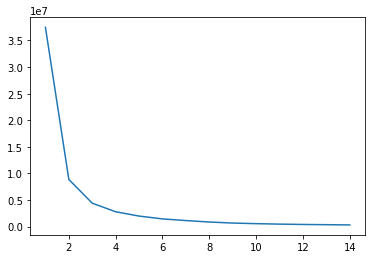

In [23]:
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani',
       'gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati',
       'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi',
       'sirketten_ayrildi', 'son_5_yilda_terfi_aldi','Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'maas_derecesi_int']

x = dflast[attributes]
elbowMethod(x)

#Bu öznitelikler için optimum küme sayısını 4 seçebiliriz.

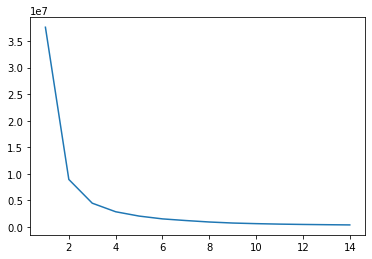

In [24]:
dict_department = {"sales" : 0 , "technical" : 1 , "support" : 2 , "IT" : 3, "product_mng" : 4, "marketing" : 5, "RandD" : 6, 
                   "accounting" : 7 , "hr" : 8 , "management" : 9}
dflast['calistigi_bolum_int'] = dflast['calistigi_bolum'].map(dict_department)

#Çalıştığı bölümler için one-hot kısımları çıkarılıp verisetindeki ilk halinin integer olarak maplenmiş hali eklenmiştir.
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani','aylik_ort_calisma_saati','sirkette_calistigi_yil_sayisi', 
              'is_kazasina_ugradi','calistigi_bolum_int','sirketten_ayrildi', 'son_5_yilda_terfi_aldi','maas_derecesi_int']

x = dflast[attributes]
elbowMethod(x)

#Bu öznitelikler için optimum küme sayısını 3 seçebiliriz.

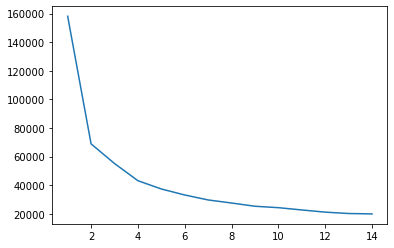

In [25]:
#Aylık ortalama çalışma süresi çıkarıldı
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani','sirkette_calistigi_yil_sayisi', 
              'is_kazasina_ugradi','calistigi_bolum_int','sirketten_ayrildi', 'son_5_yilda_terfi_aldi','maas_derecesi_int']

x = dflast[attributes]
elbowMethod(x)

#Bu öznitelikler için optimum küme sayısını 7 seçebiliriz.

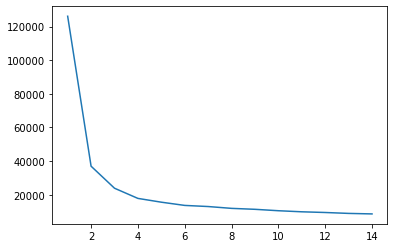

In [26]:
#Şirkette çalıştığı yıl sayısı çıkarıldı
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani', 
              'is_kazasina_ugradi','calistigi_bolum_int','sirketten_ayrildi', 'son_5_yilda_terfi_aldi','maas_derecesi_int']

x = dflast[attributes]
elbowMethod(x)

#Bu öznitelikler için optimum küme sayısını 4 seçebiliriz.

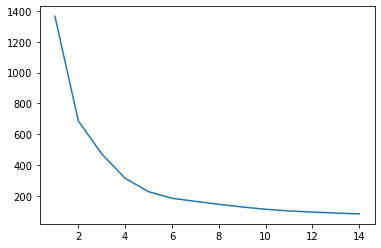

In [27]:
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani']

x = dflast[attributes]
elbowMethod(x)
#Bu öznitelikler için optimum küme sayısını 6 seçebiliriz.

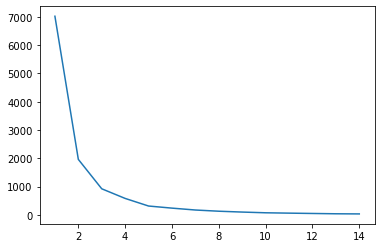

In [28]:
attributes = ['memnuniyet_duzeyi', 'maas_derecesi_int']

x = dflast[attributes]
elbowMethod(x)

#Optimum cluster 3 seçip modeli oluşturabiliriz.

Yukardaki modellerden en iyi görünenlerden birini seçip model oluşturdum.

In [29]:
attributes = ['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani',
       'gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati',
       'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi',
       'sirketten_ayrildi', 'son_5_yilda_terfi_aldi','Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'maas_derecesi_int']

x = dflast[attributes]
last_model = KMeans(n_clusters = 4)
last_model.fit(x)

KMeans(n_clusters=4)

Seçilen ve oluşturulan modelle yeni verinin hangi kümede olacağının tahminlenmesi

In [30]:
new_value = [0.69 , 0.85 ,4 ,240 ,2 ,1 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0,1]
new_array = np.reshape(new_value, (-1,1)).T
print("Yeni girilen değerin tahminlenmesi : " + str(last_model.predict(new_array)[0]) + ". kümede olmalıdır.")

Yeni girilen değerin tahminlenmesi : 0. kümede olmalıdır.
